第一问

In [26]:
import pandas as pd
import numpy as np
df=pd.read_csv("iris(1).csv")
print(df.shape)

(150, 5)


In [27]:
import patsy
response,predictors=patsy.dmatrices('variety~sepal_length+sepal_width+petal_length+petal_width+0',data=df)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(predictors,response,random_state=0)
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(112, 3)
(112, 4)
(38, 3)
(38, 4)


In [30]:
import torch
y=torch.from_numpy(y_train)
X=torch.from_numpy(X_train)
X = X.to(torch.float32)
y = y.to(torch.float32)
test_y=torch.from_numpy(y_test)
test_X=torch.from_numpy(X_test)
test_X = test_X.to(torch.float32)
test_y = test_y.to(torch.float32)

In [31]:
import torch.nn as nn
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.fc1=nn.Linear(4,400)
        self.fc11=nn.ReLU()
        self.fc2=nn.Linear(400,3)
    def forward(self,x):
        out=self.fc1(x)
        out=self.fc11(out)
        out=self.fc2(out)
        return(out)
mynet=net()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(mynet.parameters(),lr=0.001)

In [32]:
for epoch in range(1000):
    outputs=mynet(X)
    loss=criterion(outputs,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [33]:
_,predicted = torch.max(mynet(test_X), 1)
classes=['Setosa', 'Versicolor', 'Virginica']
class_correct=list(0. for i in range(3))
class_total=list(0. for i in range(3))
labels=torch.max(test_y,1)[1]
c=(predicted==labels)
for i in range(len(c)):
    label=labels[i]
    class_correct[label]+=c[i].item()
    class_total[label]+=1
print('Accuracy of All : %.3f %%' % (100*sum(class_correct)/sum(class_total)))
for i in range(3):
    print('Accuracy of %5s : %.1f %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of All : 97.368 %
Accuracy of Setosa : 100.0 %
Accuracy of Versicolor : 93.8 %
Accuracy of Virginica : 100.0 %


In [34]:
labels

tensor([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0,
        2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [36]:
test_y

tensor([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.]])

第二问

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("housing_renamed.csv")
print(df.shape)
df.head()
df.dropna(inplace=True)
list(df.columns)

(2626, 13)


['neighborhood',
 'type',
 'units',
 'year_built',
 'sq_ft',
 'income',
 'income_per_sq_ft',
 'expense',
 'expense_per_sq_ft',
 'net_income',
 'value',
 'value_per_sq_ft',
 'boro']

In [39]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
import patsy
response,predictors=patsy.dmatrices('value_per_sq_ft~neighborhood+type+units+year_built+sq_ft+income+income_per_sq_ft+expense+expense_per_sq_ft+net_income+value+boro+0',data=df)
predictors=ss.fit_transform(predictors)
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
train_size=1897
batch_size=300
iter_per_epoch=max(train_size/batch_size,1)
import torch.nn as nn
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.fc1=nn.Linear(164,2400)
        self.fc11=nn.ReLU()
        self.fc2=nn.Linear(2400,2400)
        self.fc22=nn.ReLU()
        self.fc3=nn.Linear(2400,1)
    def forward(self,x):
        out=self.fc1(x)
        out=self.fc11(out)
        out=self.fc2(out)
        out=self.fc22(out)
        out=self.fc3(out)
        return(out)
loss_list=[[]]
test_loss=[[]]
import torch
device=torch.device('cuda')
ii=0
for train,test in kf.split(predictors):
    ii+=1
    X_train,X_test=predictors[train],predictors[test]
    y_train,y_test=response[train],response[test]
    y=torch.from_numpy(y_train)
    X=torch.from_numpy(X_train)
    X = X.to(torch.float32).to(device)
    y = y.to(torch.float32).to(device)
    test_y=torch.from_numpy(y_test)
    test_X=torch.from_numpy(X_test)
    test_X = test_X.to(torch.float32).to(device)
    test_y = test_y.to(torch.float32).to(device)
    train_size=X_train.shape[0]
    batch_size=300 
    mynet=net().to(device)
    criterion=nn.MSELoss()
    optimizer=torch.optim.Adam(mynet.parameters(),lr=0.001)
    tmploss_list=[]
    tmptest_loss=[]
    for i in range(2500):
        batch_mask=np.random.choice(train_size,batch_size)
        X_batch=X[batch_mask]
        y_batch=y[batch_mask]
        outputs=mynet(X_batch)
        loss=criterion(outputs,y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tmploss_list.append(loss.item())
        if i%iter_per_epoch==0:
            tmptest_loss.append(criterion(mynet(test_X),test_y).item())
    loss_list.append(tmploss_list)
    test_loss.append(tmptest_loss)
    print(ii)

1
2
3


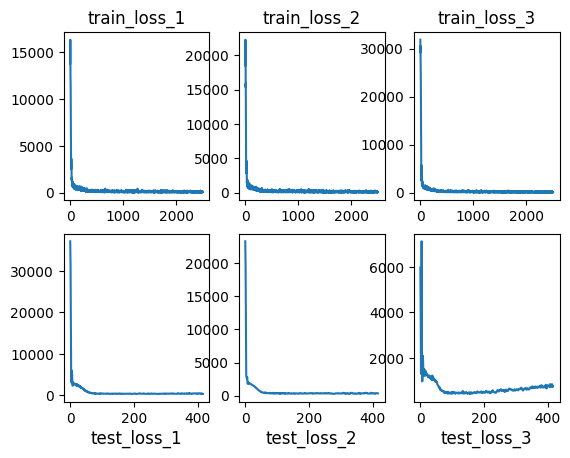

In [18]:
picdf1=pd.DataFrame(loss_list[1:]+test_loss[1:]).T
import matplotlib.pyplot as plt
fig=plt.figure()
axes1=fig.add_subplot(2,3,1)
axes1.set_title('train_loss_1')
axes2=fig.add_subplot(2,3,2)
axes2.set_title('train_loss_2')
axes3=fig.add_subplot(2,3,3)
axes3.set_title('train_loss_3')
axes4=fig.add_subplot(2,3,4)
axes4.set_title('test_loss_1',y=-0.3)
axes5=fig.add_subplot(2,3,5)
axes5.set_title('test_loss_2',y=-0.3)
axes6=fig.add_subplot(2,3,6)
axes6.set_title('test_loss_3',y=-0.3)
axes1.plot(picdf1[0])
axes2.plot(picdf1[1])
axes3.plot(picdf1[2])
axes4.plot(picdf1[3])
axes5.plot(picdf1[4])
axes6.plot(picdf1[5])

In [19]:
last_loss1=[i[-1] for i in loss_list[1:]]+[i[-1] for i in test_loss[1:]]
last_loss1

[55.117252349853516,
 69.72899627685547,
 66.14147186279297,
 378.3178405761719,
 360.5489501953125,
 767.8855590820312]

第二个模型

In [20]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
import patsy
response,predictors=patsy.dmatrices('value_per_sq_ft~neighborhood+type+units+year_built+sq_ft+income+income_per_sq_ft+expense+expense_per_sq_ft+net_income+value+boro+0',data=df)
predictors=ss.fit_transform(predictors)
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
train_size=1897
batch_size=300
iter_per_epoch=max(train_size//batch_size,1)
import torch.nn as nn
import torch.nn.functional as F
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.fc1=nn.Linear(164,700)
        self.fc11=nn.ReLU()
        self.fc2=nn.Linear(700,1000)
        self.fc22=nn.ReLU()
        self.fc3=nn.Linear(1000,700)
        self.fc33=nn.ReLU()
        self.fc4=nn.Linear(700,1)
        
    def forward(self,x):
        out=self.fc1(x)
        out=self.fc11(out)
        out=self.fc2(out)
        out=self.fc22(out)
        out=self.fc3(out)
        out=self.fc33(out)
        out=self.fc4(out)
        return(out)
loss_list=[[]]
test_loss=[[]]
import torch
device=torch.device('cuda')
ii=0
for train,test in kf.split(predictors):
    ii+=1
    X_train,X_test=predictors[train],predictors[test]
    y_train,y_test=response[train],response[test]
    y=torch.from_numpy(y_train)
    X=torch.from_numpy(X_train)
    X = X.to(torch.float32).to(device)
    y = y.to(torch.float32).to(device)
    test_y=torch.from_numpy(y_test)
    test_X=torch.from_numpy(X_test)
    test_X = test_X.to(torch.float32).to(device)
    test_y = test_y.to(torch.float32).to(device)
    train_size=X_train.shape[0]
    batch_size=300 
    mynet=net().to(device)
    criterion=nn.MSELoss()
    optimizer=torch.optim.Adam(mynet.parameters(),lr=0.001)
    tmploss_list=[]
    tmptest_loss=[]
    for i in range(2500):
        batch_mask=np.random.choice(train_size,batch_size)
        X_batch=X[batch_mask]
        y_batch=y[batch_mask]
        outputs=mynet(X_batch)
        loss=criterion(outputs,y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tmploss_list.append(loss.item())
        if i%iter_per_epoch==0:
            tmptest_loss.append(criterion(mynet(test_X),test_y).item())
    loss_list.append(tmploss_list)
    test_loss.append(tmptest_loss)
    print(ii)

1
2
3


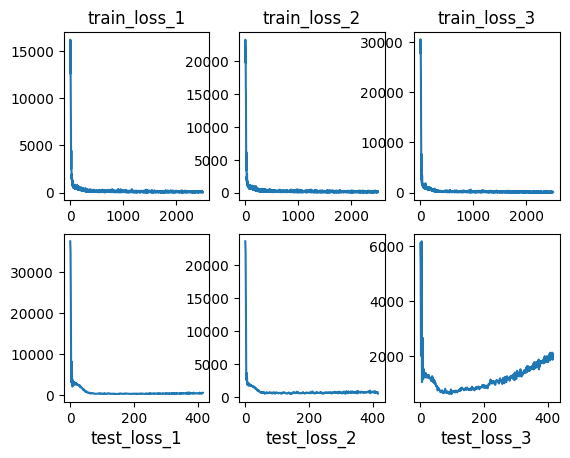

In [21]:
picdf2=pd.DataFrame(loss_list[1:]+test_loss[1:]).T
import matplotlib.pyplot as plt
fig=plt.figure()
axes1=fig.add_subplot(2,3,1)
axes1.set_title('train_loss_1')
axes2=fig.add_subplot(2,3,2)
axes2.set_title('train_loss_2')
axes3=fig.add_subplot(2,3,3)
axes3.set_title('train_loss_3')
axes4=fig.add_subplot(2,3,4)
axes4.set_title('test_loss_1',y=-0.3)
axes5=fig.add_subplot(2,3,5)
axes5.set_title('test_loss_2',y=-0.3)
axes6=fig.add_subplot(2,3,6)
axes6.set_title('test_loss_3',y=-0.3)
axes1.plot(picdf2[0])
axes2.plot(picdf2[1])
axes3.plot(picdf2[2])
axes4.plot(picdf2[3])
axes5.plot(picdf2[4])
axes6.plot(picdf2[5])

In [22]:
last_loss2=[i[-1] for i in loss_list[1:]]+[i[-1] for i in test_loss[1:]]
last_loss2

[52.21247482299805,
 69.55221557617188,
 66.01984405517578,
 659.4633178710938,
 595.222900390625,
 2061.41796875]

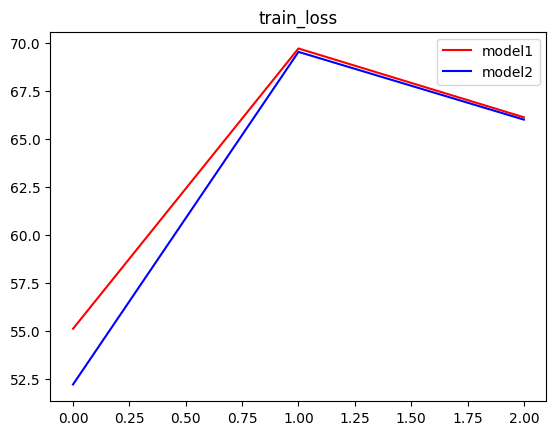

In [23]:
plt.plot(last_loss1[:3],'r-')
plt.plot(last_loss2[:3],"b-")
plt.title('train_loss')
plt.legend(['model1','model2'])

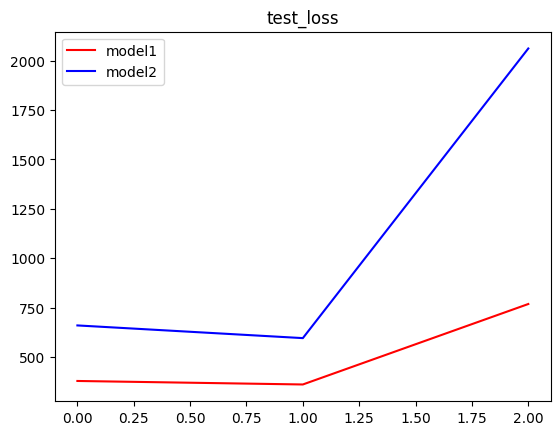

In [24]:
plt.plot(last_loss1[3:],'r-')
plt.plot(last_loss2[3:],"b-")
plt.title('test_loss')
plt.legend(['model1','model2'])

## 如果用MSE作为评价指标，可见第一个模型在训练集上总体表现比第二个模型更差，在测试集上表现比第二个模型更好，说明第一个模型学习能力较弱，但是泛化能力较强；第二个模型在训练集上总体表现比第一个模型更好，在测试集上表现比第一个模型更差，说明第二个模型学习能力较强，但是泛化能力较差。